In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


function for df generation 

In [2]:
def df_generator(df_exp_data, df_num_data, binding_site):

    num_muts = []
    num_mut_sites = [] 
    binding_site_idx = [] 
    for mut in df_num_data["mutations"].to_numpy():
        num_muts.append(mut.split("_")[0])
        num_mut_sites.append(int(mut.split("_")[0][1:-1])) #just get numerical value
    sorting_idx = np.argsort(num_mut_sites)
    num_muts = np.array(num_muts)[sorting_idx] #just sort by binding site 
    for mut in binding_site : 
        binding_site_idx.append(np.where(num_muts == mut )[0] [0]) 

    exp_muts_np = df_exp_data["mutation"].to_numpy()
    idx= []  
    for mut in num_muts : 
        idx.append(np.where(exp_muts_np == mut )[0] [0]) 
    if np.all(exp_muts_np[idx] == num_muts) == False :      #check here
        print("Error, mutations do not match")
        
    relevant_exp_data = df_exp_data.iloc[idx]["bind_avg"].to_numpy()
    R = 1.98*1e-3 #1e-3 for cal to kcal conversion 
    T =298  #room temp  
    K_D_app = 3.9*1e-11 #from paper 
    delta_g_deg = R * T * np.log(K_D_app)
    tmp_K_mut = 10**(relevant_exp_data) * K_D_app
    delta_g_first_method = -R * T * np.log(tmp_K_mut)

    del_del_g_total = - ( delta_g_deg + delta_g_first_method) 

    df_num_data_sorted= df_num_data.iloc[sorting_idx].copy()
    df_num_data_sorted["exp_data"] = del_del_g_total
    df_num_data_sorted["mutations"] = num_muts
    df_num_data_sorted_binding_site = df_num_data_sorted.iloc[binding_site_idx].copy()
    return df_num_data_sorted, df_num_data_sorted_binding_site, binding_site_idx

binding site dec

In [3]:
binding_site =np.array( ['K417A', 'N439A', 'Y449A', 'Y453A', 'L455A', 'F456A',
       'F486A', 'N487A', 'Y489A', 'Q493A', 'S494A', 'Q498A',
       'T500A', 'N501A', 'V503A', 'Y505A'])

Mbdoni resutls 

In [4]:
df_exp_data = pd.read_csv("single_mut_effects.csv")
df_num_data_mbondi = pd.read_csv("all_amino_pb_gb_gb66.csv", index_col=0)
df_num_data_sorted_mbondi, df_num_data_sorted_binding_site_mbondi, binding_site_idx = \
    df_generator(df_exp_data, df_num_data_mbondi, binding_site)

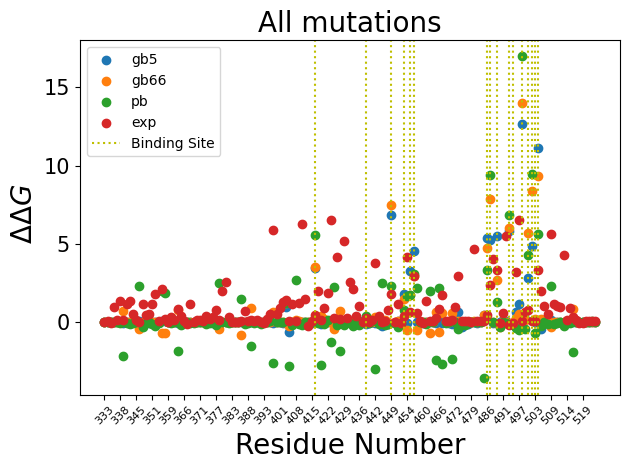

In [5]:
plt.scatter( df_num_data_sorted_mbondi["mutations"]
            ,-df_num_data_sorted_mbondi["delta_delta_g_gen"], label="gb5")
plt.scatter( df_num_data_sorted_mbondi["mutations"]
            ,-df_num_data_sorted_mbondi["delta_delta_g_gen_66"], label="gb66")
plt.scatter( df_num_data_sorted_mbondi["mutations"]
            ,-df_num_data_sorted_mbondi["delta_delta_g_pb"], label="pb")
plt.scatter( df_num_data_sorted_mbondi["mutations"]
            ,-df_num_data_sorted_mbondi["exp_data"], label="exp")
            


tick_positions = np.arange(0, len(df_num_data_sorted_mbondi["mutations"]), 5)
tick_labels = [df_num_data_sorted_mbondi["mutations"].iloc[pos] for pos in tick_positions]

tick_labels = [df_num_data_sorted_mbondi["mutations"].iloc[pos][1:-1] for pos in tick_positions]
plt.xticks(tick_positions, tick_labels,rotation=45,  fontsize = 8)
plt.xlabel("Residue Number", fontsize = 20)
plt.yticks(fontsize= 15)
for true_idx , idx in enumerate(binding_site_idx):
    if binding_site_idx[true_idx] == binding_site_idx[-1] : #for the last one
        plt.axvline(x=idx, color='y', linestyle=':', label = "Binding Site")
    else:
        plt.axvline(x=idx, color='y', linestyle=':')
    

plt.legend()
plt.title("All mutations", fontsize = 20)
plt.ylabel(" $\Delta \Delta G$", fontsize = 20)
plt.tight_layout()
plt.savefig("all_muts_fig.png")

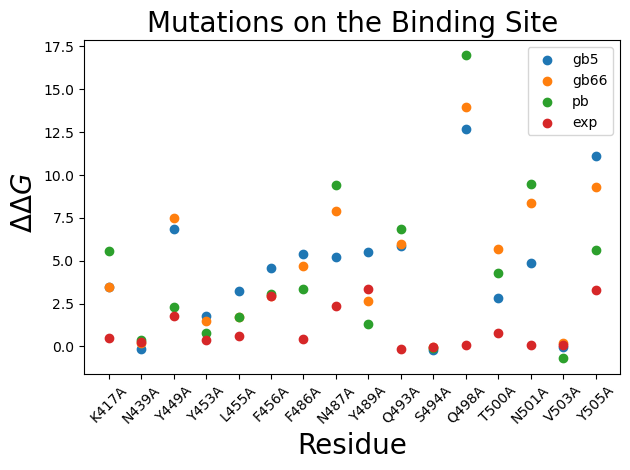

In [6]:
plt.scatter( df_num_data_sorted_binding_site_mbondi["mutations"]
            ,-df_num_data_sorted_binding_site_mbondi["delta_delta_g_gen"], label="gb5")
plt.scatter( df_num_data_sorted_binding_site_mbondi["mutations"]
            ,-df_num_data_sorted_binding_site_mbondi["delta_delta_g_gen_66"], label="gb66")
plt.scatter( df_num_data_sorted_binding_site_mbondi["mutations"]
            ,-df_num_data_sorted_binding_site_mbondi["delta_delta_g_pb"], label="pb")
plt.scatter( df_num_data_sorted_binding_site_mbondi["mutations"]
            ,-df_num_data_sorted_binding_site_mbondi["exp_data"], label="exp")
            
plt.legend()
plt.title("Mutations on the Binding Site", fontsize = 20)
plt.ylabel(" $\Delta \Delta G$", fontsize = 20)
plt.xticks(rotation=45)
plt.xlabel("Residue",  fontsize = 20)
plt.tight_layout()
plt.savefig("binding_site_fig.png")

In [7]:


window_size = 3
moving_average = np.convolve(-df_num_data_sorted_mbondi["delta_delta_g_gen"], np.ones(window_size)/window_size, mode='valid')


In [8]:
len(df_num_data_sorted_mbondi["mutations"])

155

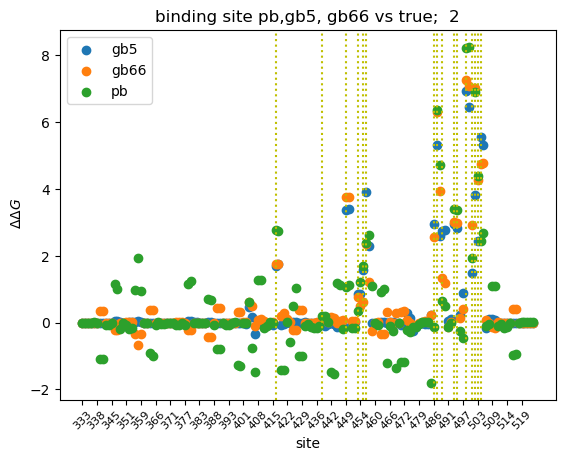

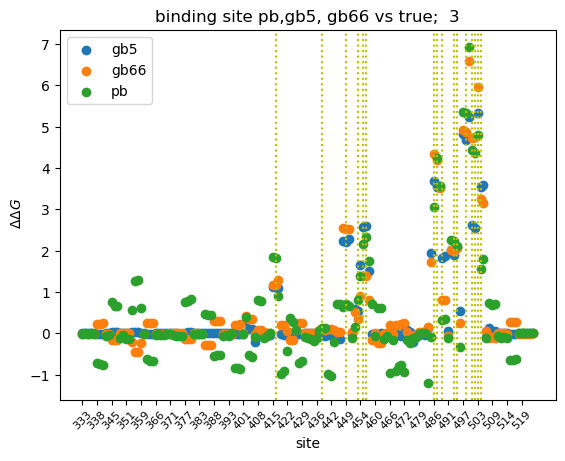

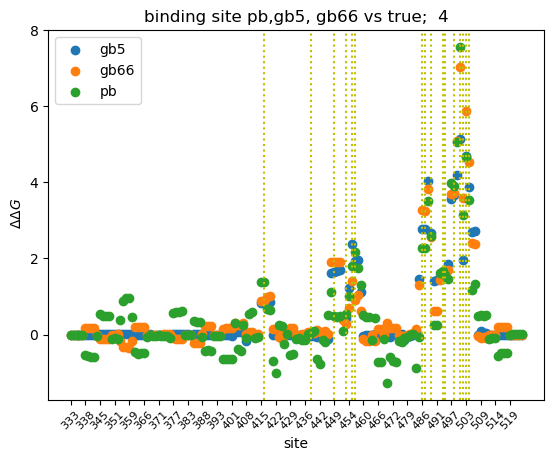

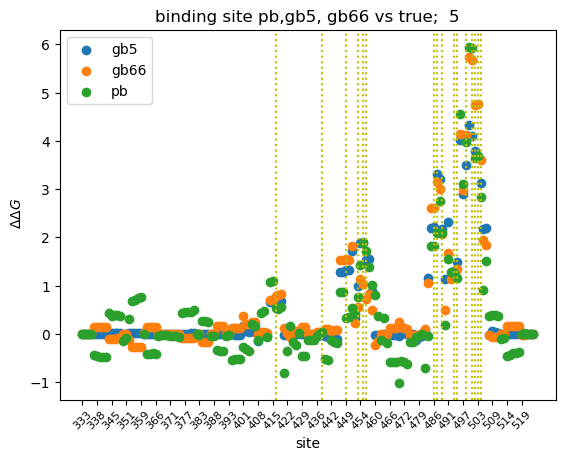

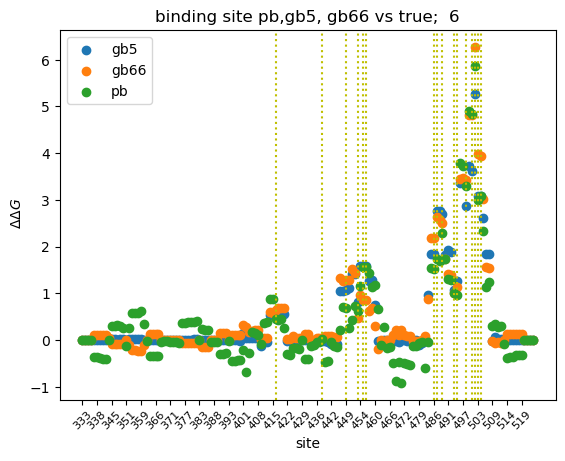

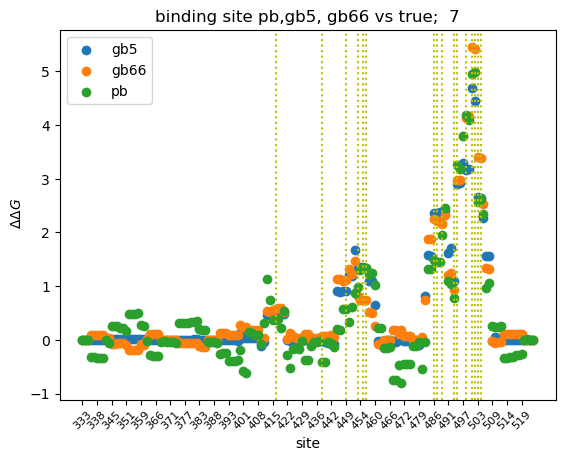

In [9]:
window_sizes = [2, 3, 4, 5, 6, 7]
for window_size in window_sizes : 
    
    moving_average_g_gen = np.convolve(-df_num_data_sorted_mbondi["delta_delta_g_gen"],\
        np.ones(window_size)/window_size, mode='same')
    #

    
    
    moving_average_g_gen_66 = np.convolve(-df_num_data_sorted_mbondi["delta_delta_g_gen_66"],\
        np.ones(window_size)/window_size, mode='same')
  
    
    moving_average_pb = np.convolve(-df_num_data_sorted_mbondi["delta_delta_g_pb"],\
        np.ones(window_size)/window_size, mode='same')
    
    
    plt.figure()
    plt.scatter( df_num_data_sorted_mbondi["mutations"]
                ,moving_average_g_gen, label="gb5")
    plt.scatter( df_num_data_sorted_mbondi["mutations"]
                ,moving_average_g_gen_66, label="gb66")
    plt.scatter( df_num_data_sorted_mbondi["mutations"]
                ,moving_average_pb, label="pb")
    # plt.scatter( df_num_data_sorted_mbondi["mutations"]
    #             ,-df_num_data_sorted_mbondi["exp_data"], label="exp")
                
    plt.legend()
    plt.title(f"binding site pb,gb5, gb66 vs true;  {window_size}")
    plt.ylabel(" $\Delta \Delta G$")

    tick_positions = np.arange(0, len(df_num_data_sorted_mbondi["mutations"]), 5)
    tick_labels = [df_num_data_sorted_mbondi["mutations"].iloc[pos] for pos in tick_positions]

    tick_labels = [df_num_data_sorted_mbondi["mutations"].iloc[pos][1:-1] for pos in tick_positions]
    plt.xticks(tick_positions, tick_labels,rotation=45,  fontsize = 8)
    plt.xlabel("site")

    for idx in binding_site_idx:
        plt.axvline(x=idx, color='y', linestyle=':')

correlation stuff

In [15]:

col_names= ["gb5","gb66", "pb" , "exp"]

all_data = np.vstack((-df_num_data_sorted_mbondi["delta_delta_g_gen"],
          -df_num_data_sorted_mbondi["delta_delta_g_gen_66"],
          -df_num_data_sorted_mbondi["delta_delta_g_pb"],
          -df_num_data_sorted_mbondi["exp_data"]
          )).T


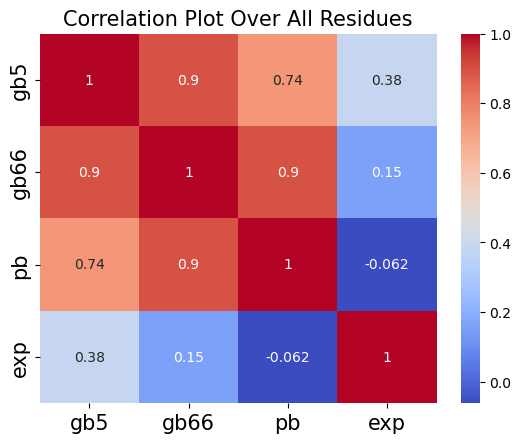

In [29]:

corr = np.corrcoef(all_data, rowvar=False)
sns.heatmap(corr, annot=True, cmap='coolwarm', xticklabels=col_names, yticklabels=col_names)
plt.title('Correlation Plot Over All Residues', fontsize=15)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 )
plt.savefig("corr_all_muts.png")

corr stuff on binding site

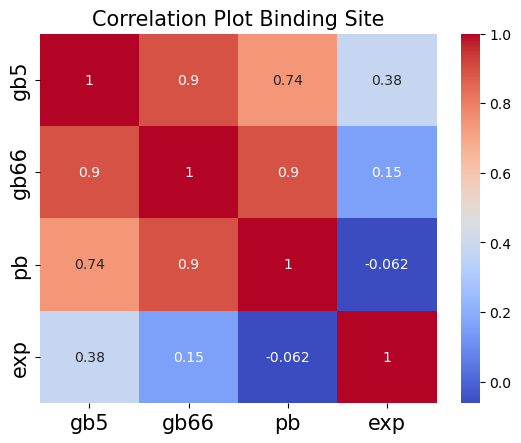

In [30]:
col_names= ["gb5","gb66", "pb" , "exp"]
all_data = np.vstack((-df_num_data_sorted_binding_site_mbondi["delta_delta_g_gen"],
          -df_num_data_sorted_binding_site_mbondi["delta_delta_g_gen_66"],
          -df_num_data_sorted_binding_site_mbondi["delta_delta_g_pb"],
          -df_num_data_sorted_binding_site_mbondi["exp_data"]
          )).T
corr = np.corrcoef(all_data, rowvar=False)
sns.heatmap(corr, annot=True, cmap='coolwarm', xticklabels=col_names, yticklabels=col_names)
plt.title('Correlation Plot Binding Site', fontsize=15)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 )
plt.savefig("corr_binding_site.png")

histogram stuff

<Figure size 640x480 with 0 Axes>

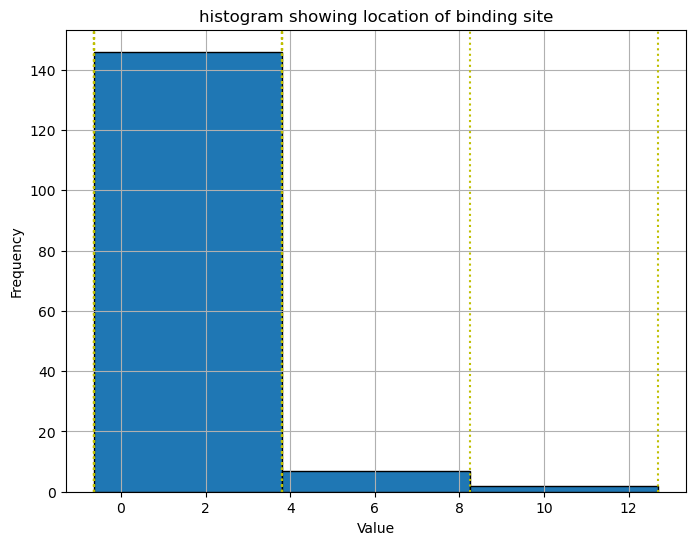

In [70]:
bin_arr = np.arange(3, 5, 5)
for num_bins in bin_arr:
    plt.figure()
    data = -df_num_data_sorted_mbondi["delta_delta_g_gen"]  
    binding_site_data = -df_num_data_sorted_binding_site_mbondi["delta_delta_g_gen"]
    # Compute histogram
    counts, bins = np.histogram(data, bins=num_bins)
    # Find indices of values in each bin
    indices = np.digitize(data, bins)
    binding_site_indices = np.digitize(binding_site_data, bins)
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=bins, edgecolor='black')  # Plot histogram with specified bins
    plt.title('histogram showing location of binding site')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    for idx in binding_site_indices:
        plt.axvline(x=bins[idx-1], color='y', linestyle=':')
    plt.grid(True)
    plt.show()

    binding_site_indices



clustering stuff (pretty much just hist)

In [159]:
def smple_clust(col, num_clust = 4, plot_command = 0) : 
        
        all_sites_data          =-df_num_data_sorted_mbondi[col]
        binding_site_data       = -df_num_data_sorted_binding_site_mbondi[col]
        
        gb5_dat = all_sites_data.to_numpy() 
        # Reshape data for KMeans input (reshape to 2D array)
        gb5_dat_reshape = gb5_dat.reshape(-1, 1)
        # Apply K-means clustering
        kmeans = KMeans(n_clusters=num_clust, random_state=0)
        labels = kmeans.fit_predict(gb5_dat_reshape)
        
        zero_clust_idx = abs(kmeans.cluster_centers_).argmin() #near zero val 
        binding_site_dat = binding_site_data.to_numpy()
        gb5_dat_reshape_binding_site = binding_site_dat.reshape(-1, 1)
        labels_binding_site = kmeans.predict(gb5_dat_reshape_binding_site)
        model_accuracy = (len(labels_binding_site[labels_binding_site != zero_clust_idx]))/(len(labels_binding_site)) *100
        
        if plot_command == 1 :
                #title stuff
                tmp_col = col.split("delta")
                if len(tmp_col) >1 :
                        title_str = (col.split("delta")[-1][1:])
                else:
                        title_str = (col.split("_")[0])
                # Plotting the clusters
                plt.figure(figsize=(8, 6))
                plt.scatter(df_num_data_sorted_mbondi["mutations"], gb5_dat, c=labels, s=50, cmap='viridis')
                plt.ylabel('ddg')
                tick_labels = [df_num_data_sorted_mbondi["mutations"].iloc[pos][1:-1] for pos in tick_positions]
                plt.xticks(tick_positions, tick_labels,rotation=45,  fontsize = 8)
                plt.xlabel("site")
                for idx in binding_site_idx:
                        plt.axvline(x=idx, color='y', linestyle=':')
                plt.title(f'K-means Clustering {title_str}; {model_accuracy}')
                plt.show()

        return model_accuracy

arr of all cols

In [152]:
cols_to_test = ["delta_delta_g_gen","delta_delta_g_gen_66","delta_delta_g_pb","exp_data"]

In [173]:
random_state=0 

for col in cols_to_test :
    model_accuracy = smple_clust(col)
    print(f"{col:<25}: {model_accuracy:>5}")

delta_delta_g_gen        : 81.25
delta_delta_g_gen_66     :  75.0
delta_delta_g_pb         :  75.0
exp_data                 :  37.5


c:\Users\13108\mambaforge\envs\spines\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\13108\mambaforge\envs\spines\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\13108\mambaforge\envs\spines\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\13108\mambaforge\envs\spines\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha